# Model for Students

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Mental_Health_S = pd.read_csv('Datasheet/MH.Student.Clean.2.5.csv')

In [3]:
Mental_Health_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   CGPA                                   27892 non-null  float64
 5   Sleep Duration                         27901 non-null  float64
 6   Dietary Habits                         27901 non-null  float64
 7   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 8   Work/Study Hours                       27901 non-null  float64
 9   Financial Stress                       27901 non-null  float64
 10  Family History of Mental Illness       27901 non-null  int64  
 11  Wo

In [4]:
Mental_Health_S = Mental_Health_S.drop(columns = ['City', 'Work'])

In [5]:
Mental_Health_S['CGPA'] = Mental_Health_S['CGPA'].fillna(Mental_Health_S['CGPA'].mean())

In [6]:
Mental_Health_S.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   CGPA                                   27901 non-null  float64
 4   Sleep Duration                         27901 non-null  float64
 5   Dietary Habits                         27901 non-null  float64
 6   Have you ever had suicidal thoughts ?  27901 non-null  int64  
 7   Work/Study Hours                       27901 non-null  float64
 8   Financial Stress                       27901 non-null  float64
 9   Family History of Mental Illness       27901 non-null  int64  
 10  Satisfaction                           27901 non-null  float64
 11  Pr

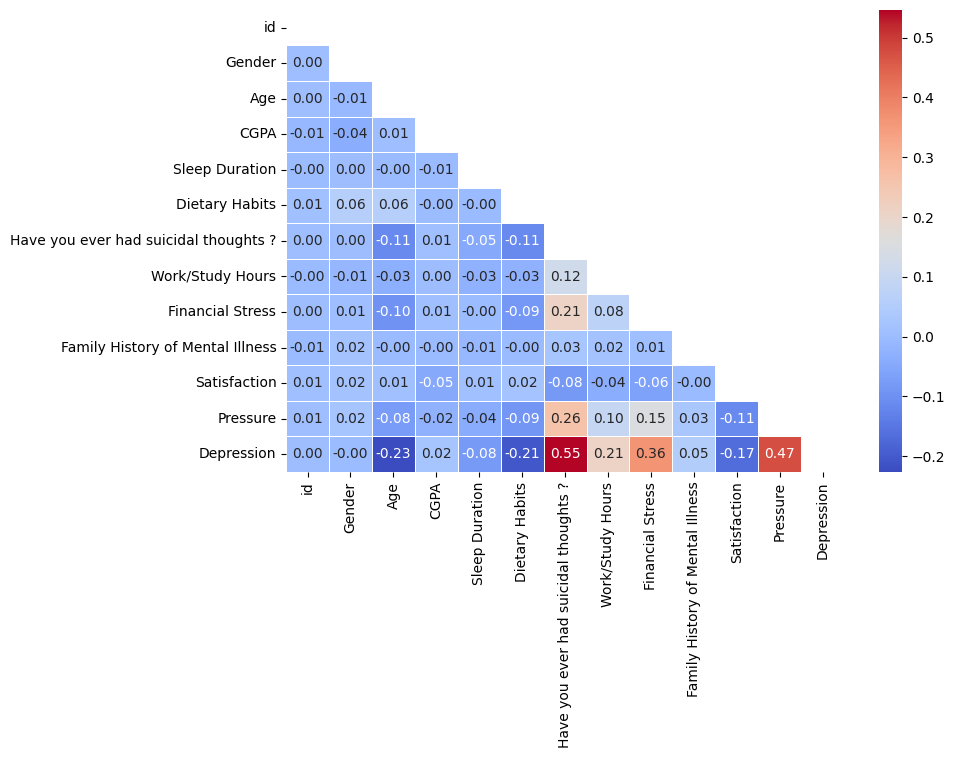

In [52]:
corr = Mental_Health_S.corr(numeric_only=True)
cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(Mental_Health_S.corr(numeric_only=True), annot=True, fmt='.2f', linewidth=0.5, cmap='coolwarm', mask=np.triu(Mental_Health_S.corr(numeric_only=True)))
plt.savefig('fig_corr_S_1.png')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import sklearn
from sklearn.tree import DecisionTreeClassifier # predict proba
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

In [9]:
model_stu = XGBClassifier()

In [10]:
model_stu.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [35]:
params = {'base_score': [0.5],
         'booster': ['gbtree'],
         'colsample_bylevel': [1],
         'colsample_bynode': [0.3,0.5],
         'colsample_bytree': [0.4,0.5],
         'gamma': [0.1],
         'learning_rate': [0.05,0.04,0.03],
         'max_depth':[2,3,4,5],
         'min_child_weight': [1],
         'n_estimators': [400,500,600],
         'n_jobs': [-1],
         'reg_alpha': [0.1],
         'reg_lambda': [0.1],
         'scale_pos_weight': [1],
         'subsample': [0.9]}

In [36]:
scoring = ["roc_auc"]
grid_solver = GridSearchCV(estimator = model_stu,
                   param_grid = params,
                   scoring = scoring,
                   cv = 5,
                   n_jobs=-1,
                   refit="roc_auc",
                   verbose = 2)

In [37]:
X = Mental_Health_S.drop(columns = ["Depression"])
y = Mental_Health_S["Depression"]
student_results = grid_solver.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits

[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.4, colsample_bytree=0.5, gamma=0.1, learning_rate=0.04, max_depth=5, min_child_weight=1, n_estimators=500, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, subsample=0.9; total time=   0.5s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.4, colsample_bytree=0.5, gamma=0.1, learning_rate=0.03, max_depth=2, min_child_weight=1, n_estimators=400, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, subsample=0.9; total time=   0.3s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.4, colsample_bytree=0.5, gamma=0.1, learning_rate=0.03, max_depth=2, min_child_weight=1, n_estimators=500, n_jobs=-1, reg_alpha=0.1, reg_lambda=0.1, scale_pos_weight=1, subsample=0.9; total time=   0.3s
[CV] END base_score=0.5, booster=gbtree, colsample_bylevel=1, colsample_bynode=0.4, 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/ma/core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [38]:
student_results.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=0.5, colsample_bytree=0.5,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.04, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred_Stu = student_results.predict(X)
y_pred_Stu

array([1, 0, 0, ..., 0, 1, 1], shape=(27901,))

In [ ]:
# define a threshold
# threshold = 0.5
# y_pre_bin = np.where(y_pre > threshold, 1, 0)

In [32]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No depresive","Depressive"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

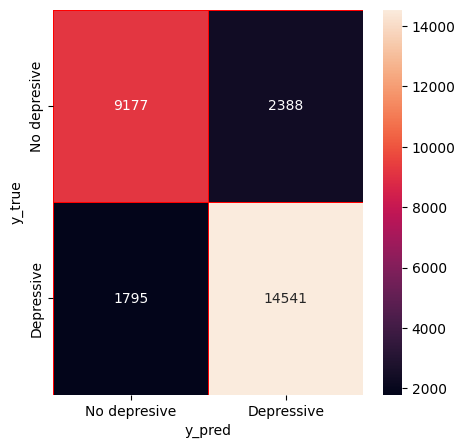

In [40]:
confusion(y,y_pred_Stu)

In [41]:
from sklearn.metrics import accuracy_score
Xboost_City = accuracy_score(y,y_pred_Stu)
Xboost_City

0.850077058169958

### Model Random Forest

In [ ]:
# X = Mental_Health_Agra.drop(columns = ["City","Depression"])
# y = Mental_Health_Agra["Depression"]

In [ ]:
# check the param of the model 'Random Forest'
RandomForestClassifier().get_params()

In [ ]:
# modification of the param 'Random Forest'
params_Stu = {'ccp_alpha': [0.0 ,0.01],
 'max_depth': [3, 4, 5, 6], # branches of the trees
 'max_features': [0.1, 0.3, 0.6], # features considered
 'max_samples': [0.4, 0.6,0.8], # test-train population
 'n_estimators': [1000], # number trees
 'n_jobs': [-1]} # multicore

In [ ]:
n_cv = 5
student_results_RF = RandomForestClassifier()

scoring = ['neg_mean_squared_error', 'explained_variance', 'r2']

# I made the evaluation with GridSeacrh
grid_stu_Forest = GridSearchCV(estimator = student_results_RF, # model to train
                           param_grid = params_Stu, # param_grid
                           scoring = scoring,
                           cv = n_cv, #number of independent 
                           refit = 'neg_mean_squared_error',
                           verbose = 2) 

In [ ]:
# searchin for the in the forest.
model_stu_solver = grid_stu_Forest.fit(X, y)

In [ ]:
Forest_stu = model_stu_solver.best_estimator_
Forest_stu

In [ ]:
y_pred_F = Forest_stu.predict(X)
y_pred_F

In [ ]:
threshold = 0.5
y_pred_F_bin = np.where(y_pred_F > threshold, 1, 0)
y_pred_F_bin

In [ ]:
confusion(y,y_pred_F_bin)

In [ ]:
Forest_City = accuracy_score(y,y_pred_F_bin)
Forest_City

In [ ]:
Xboost_City - Forest_City

### For the student, it seems that the best model is Xboost

## Test Students

In [44]:
MH_Test_Student = pd.read_csv('Datasheet/MH.Test.Student.Clean.2.5.csv')
MH_Test_Student.head(3)

,id,Gender,Age,City,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Work,Satisfaction,Pressure
0,140703,1,23.0,Rajkot,6.84,8.5,1.0,1,10.0,4.0,0,Student,1.0,5.0
1,140708,1,21.0,Surat,7.39,4.5,2.0,0,8.0,1.0,1,Student,3.0,1.0
2,140719,0,28.0,Lucknow,6.03,7.5,1.0,0,11.0,3.0,1,Student,3.0,5.0


In [45]:
Students_model = student_results.best_estimator_

In [46]:
Students_Prediction = Students_model.predict(MH_Test_Student.drop(columns = ["City","Work"]))

In [47]:
Students_Prediction 

array([1, 0, 1, ..., 0, 0, 0], shape=(18772,))

In [48]:
MH_Test_Student["Depression"] = Students_Prediction 

In [49]:
MH_Test_Student

,id,Gender,Age,City,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Work,Satisfaction,Pressure,Depression
0,140703,1,23.0,Rajkot,6.84,8.5,1.0,1,10.0,4.0,0,Student,1.0,5.0,1
1,140708,1,21.0,Surat,7.39,4.5,2.0,0,8.0,1.0,1,Student,3.0,1.0,0
2,140719,0,28.0,Lucknow,6.03,7.5,1.0,0,11.0,3.0,1,Student,3.0,5.0,1
3,140720,1,26.0,Ghaziabad,8.63,8.5,1.0,1,10.0,4.0,1,Student,5.0,3.0,1
4,140721,0,32.0,Visakhapatnam,8.61,4.5,1.0,1,11.0,5.0,0,Student,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18767,234485,0,33.0,Agra,5.74,7.5,1.0,1,12.0,5.0,1,Student,2.0,5.0,1
18768,234490,0,19.0,Nashik,8.96,7.5,0.0,0,2.0,2.0,1,Student,3.0,4.0,0
18769,234493,1,29.0,Vadodara,5.58,8.5,2.0,1,8.0,2.0,1,Student,5.0,2.0,0
18770,234494,0,33.0,Nashik,7.92,8.5,2.0,1,9.0,2.0,0,Student,2.0,1.0,0


In [50]:
Submission_Students = MH_Test_Student[['id','Depression']]
Submission_Students

,id,Depression
0,140703,1
1,140708,0
2,140719,1
3,140720,1
4,140721,1
...,...,...
18767,234485,1
18768,234490,0
18769,234493,0
18770,234494,0


In [ ]:
# df_results = result.sort_values(by='id', ascending=True).reset_index(drop=True)

In [51]:
Submission_Students.to_csv('Datasheet/submission/Submission.2.5.Students.csv', index=False)

